# Exlplore Logistic regression 



In [2]:
# load data 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

# Load data from sklean dataset 
## Breast_cancer dataset
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

### Number of samples: 569
### x: 30 features, eg: radius (mean), texture (mean), etc. 
### y: Diagnose result: 0 or 1 


/Users/yuzhe-li/miniconda3/envs/myenv/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.0' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/yuzhe-li/miniconda3/envs/myenv/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


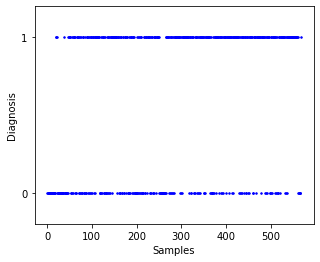

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
import pandas as pd

def sklearn_to_df(data_loader):
    X_data = data_loader.data
    X_columns = data_loader.feature_names
    x = pd.DataFrame(X_data, columns=X_columns)

    y_data = data_loader.target
    y = pd.Series(y_data, name='target')

    return x, y
X,Y = sklearn_to_df(load_breast_cancer())
fig, ax = plt.subplots(figsize = (5,4))
ax.plot(Y,'b.',markersize = '3')
ax.set_xlabel('Samples')
ax.set_ylabel('Diagnosis') 
ax.set_yticks([0,1])
ax.set_ylim([-0.2,1.2])
plt.show()
X


# What is Logistic regression?

## Linear model for classifation using sigmoid function 

### $$ y = \sigma (w^Tx+b)$$
#### where $\sigma(x) = \frac{1}{1+e^{-x}}$

 <!-- <img src="https://developer.ibm.com/developer/default/articles/implementing-logistic-regression-from-scratch-in-python/images/sigmoid.png" width="500"/>
 -->




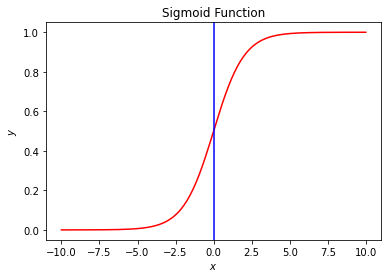

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10,10,200)
y = sigmoid(x)
plt.plot(x,y,'r')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.vlines(x = 0, ymin = -0.05, ymax = 1.05, colors = 'b')
plt.ylim([-0.05,1.05])
plt.title('Sigmoid Function')
plt.show()

 # How to fit to the sigmoid function above?

 ## Basic gradient descent algorithm 

### 1. Set a initial value to the weight paramter $w = w_0$
 ### 2. Update the parameter $w$ using gradient descent : 

 ### $$w= w -\alpha \nabla E(w)$$
 ### or also can be written: $$w  = w -\alpha \frac{\partial E(w)}{\partial w},$$ $\alpha$ is learning rate.

 ### $E(w)$ is often defined as estimation error, e.g, least-squre-error: 
 ### $$E(w) = \frac{1}{2}(y-f(w,x))^2,$$ 
 ### then the gradient of $E(w)$: $$\nabla E(w) = (y-f(w,x))  \frac{\partial f(w,x)}{\partial w}$$
  
  <!-- $w= w -\alpha \nabla E(w)$ -->
 

# Apply the gradient updating rule to sigmoid function:
### $$E(w) =  \frac{1}{2}(y-\sigma (w^x) )^2 $$

### $$\nabla E(w) = (y-f(w,x)) (1+e^{-x})^{-2} e^{-x}$$


 ### $$w= w -\alpha \nabla E(w)$$

In [5]:
data = load_breast_cancer()

# load feature
x = data['data']
# load target 
y = data['target']

# Names of dimenstions of features, and targe
x_names = data['feature_names']
y_name = data['target_names']


print('Features:', x_names)
print('Diagnosis Result:',y_name)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Diagnosis Result: ['malignant' 'benign']


In [6]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(max_iter = 10000, penalty='l2')

from sklearn import preprocessing
ss = preprocessing.StandardScaler()
x_norm = ss.fit_transform(x)
logit_model=logit.fit(x_norm,y)
feature_names =X.columns
pd.DataFrame(logit_model.coef_, columns=feature_names)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.363171,-0.387703,-0.351114,-0.435559,-0.161765,0.562595,-0.859898,-0.962222,0.076168,0.322186,...,-1.029361,-1.314593,-0.823317,-1.010594,-0.670731,0.044659,-0.873301,-0.911958,-0.887897,-0.479831


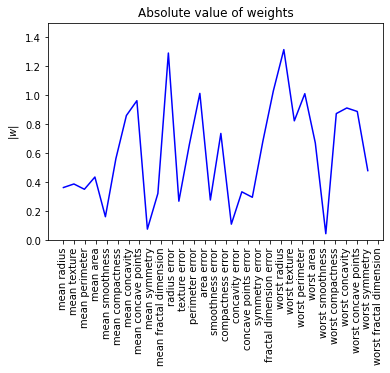

In [7]:
fig, ax = plt.subplots()
ax.plot(np.abs(logit_model.coef_.T),'b')
ax.set_xticks(np.linspace(0,len(feature_names),len(feature_names)))
ax.set_xticklabels(feature_names, rotation = 90)
ax.set_ylim([0,1.5])
ax.set_title('Absolute value of weights')
ax.set_ylabel(r'$|w|$')
plt.show()

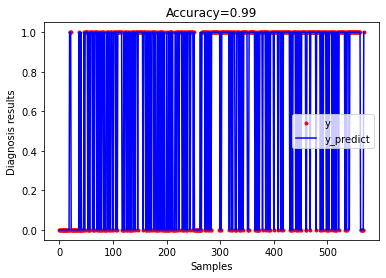

In [8]:
y_predict = logit_model.predict(x_norm)
accurracy = np.sum(y_predict==y)/len(y)

plt.plot(y,'r.',label = 'y')
plt.plot(y_predict,'b',label ='y_predict')
plt.legend()
plt.title('Accuracy='+str(accurracy.round(2)))
plt.xlabel('Samples')
plt.ylabel('Diagnosis results')
plt.show()

# y_predict_prob = logit_model.predict_proba(x_norm)
# plt.plot(y_predict_prob[:,1]); plt.show()


In [8]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        # X.shape: (n_samples, n_features)
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.w = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.w -= self.lr * gradient
            
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.w))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [9]:
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
x_norm = ss.fit_transform(x)
model = LogisticRegression()

model.fit(x_norm,y)

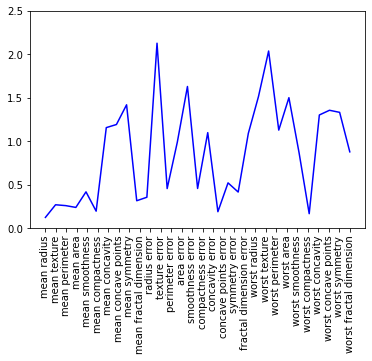

In [10]:

fig, ax = plt.subplots()
ax.plot(np.abs(model.w),'b')
ax.set_xticks(np.linspace(0,len(feature_names),len(feature_names)))
ax.set_xticklabels(feature_names, rotation = 90)
ax.set_ylim([0,2.5])
plt.show()

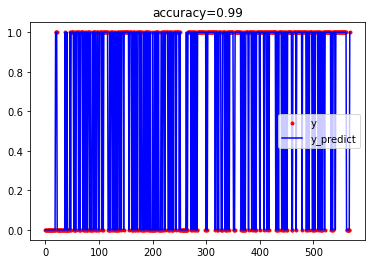

In [11]:
y_predict = model.predict(x_norm)
accurracy = np.sum(y_predict==y)/len(y)

plt.plot(y,'r.',label = 'y')
plt.plot(y_predict,'b',label ='y_predict')
plt.legend()
plt.title('accuracy='+str(accurracy.round(2)))
plt.show()

# y_predict_prob = model.predict_proba(x_norm)
# plt.plot(y_predict_prob[:,1]); plt.show()


# Bayesian logistic regression 

### Prior: $P(w)= N(w|m_0, S_0)$

### Likelihood:  $P(t|w,x) = Bernulli(t|y) = y^t(1-y)^{1-t}$
#### where $y = P(t = 1|w,x) = \sigma(w^Tx)$

### Posterior: $P(w|t)\propto P(t|w)P(w)$

$\log P(w|t) = \log P(w)+\log  P(t|w)  = -\frac{1}{2}(w-m_0)^TS_0^{-1}(w-m_0)+\sum_n \{t_n\log y_n+(1-t_n)\log (1-y_n)\}+const$

 ### Result using Laplace approximation: 
 ### $q(w) = N(w|w_{MAP}, S_N)$

 where $S_N = S_0^{-1}+\sum_n y_n(1-y_n)x_nx_n^T$

# Direct prediction (Semi-Bayesian)
$y =\sigma(w_{MAP}^Tx)$ 
 # Full Bayesian Pridictive distribution 
 $P(C_1|t,x) = \int P(C_1|t,x,w)P(w|t) dw \approx \int \sigma(w^Tx)q(w) dw$
 ### Using probit approximation: 

$P(C_1|t,x) = \sigma(\kappa (\sigma_a^2)\mu_a)$

where 

$\kappa (\sigma^2) = (1+\pi\sigma^2/8)^{-1/2}$

$\mu_a  = w_{MAP}^Tx$

$\sigma_a = x^TS_Nx$ 

$S_N = S_0^{-1}+\sum_n y_n(1-y_n)x_nx_n^T$

In [11]:
class BayesianLogisticRegression():
    def __init__(self) -> None:
        pass
    from scipy.optimize import fmin_l_bfgs_b as minimise

    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    def log_prior(self,w, variance):
        return -1 / (2 * variance) * (w.T @ w)
    def log_likelihood(self,w, X, y):
        sigma = self.sigmoid(X @ w)
        return np.sum(y * np.log(sigma)+ (1 - y) * np.log(1 - sigma))

    def log_posterior(self,w, X, y, prior_variance):
        return self.log_likelihood(w, X, y) + self.log_prior(w, prior_variance)

    def posterior_gradient(self,w, X, y, prior_variance):
        return (y - self.sigmoid(X @ w)) @ X - w / prior_variance



    def find_w_map(self,X, y, prior_variance=1, w0=None):
        from scipy.optimize import fmin_l_bfgs_b as minimise

        if w0 is None:
            w0 = np.random.normal(size=X.shape[1])
            
        w_map, *d = minimise(lambda w, X, y, prior_variance: -self.log_posterior(w, X, y, prior_variance),
                            w0,
                            lambda w, X, y, prior_variance: -self.posterior_gradient(w, X, y, prior_variance),
                            args=[X, y, prior_variance])
        return w_map



    def calculate_hessian(self,weights,X_train, prior_variance):
        # The Hessian will be MxM, where M is the number of features
        M = weights.shape[0]
        
        
        # Contribution from prior
        h = np.identity(M) / prior_variance 
        
        # Contribution from data
        for x in X_train:
            sigma = self.sigmoid(weights @ x)
            h += sigma * (1 - sigma) * np.outer(x, x) 
            
        return h       

    def laplace_prediction(self,inputs, weights,X_train,  prior_variance=1):
        S_N = np.linalg.inv(self.calculate_hessian(weights, X_train, prior_variance))
        predictive_mean = inputs @ weights
        predictive_variance = np.array([x.T @ S_N @ x for x in inputs])
        return self.sigmoid(predictive_mean / np.sqrt(1 + predictive_variance*np.pi/8))

In [12]:
model = BayesianLogisticRegression()
w_map = model.find_w_map(x, y)
y_predict_pro = model.laplace_prediction(x,w_map,x)

/var/folders/v9/ctrf9n_91nb_r6s_7zn75q1r0000gn/T/ipykernel_73580/1397963131.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/v9/ctrf9n_91nb_r6s_7zn75q1r0000gn/T/ipykernel_73580/1397963131.py:12: RuntimeWarning: divide by zero encountered in log
  return np.sum(y * np.log(sigma)+ (1 - y) * np.log(1 - sigma))
/var/folders/v9/ctrf9n_91nb_r6s_7zn75q1r0000gn/T/ipykernel_73580/1397963131.py:12: RuntimeWarning: invalid value encountered in multiply
  return np.sum(y * np.log(sigma)+ (1 - y) * np.log(1 - sigma))


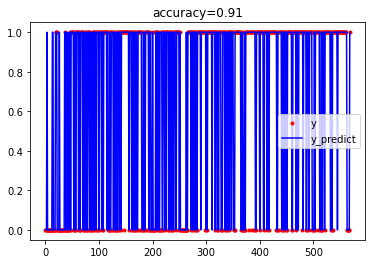

In [13]:
y_predict = (y_predict_pro>=0.5)

accurracy = np.sum(y_predict==y)/len(y)

plt.plot(y,'r.',label = 'y')
plt.plot(y_predict,'b',label ='y_predict')
plt.legend()
plt.title('accuracy='+str(accurracy.round(2)))
plt.show()

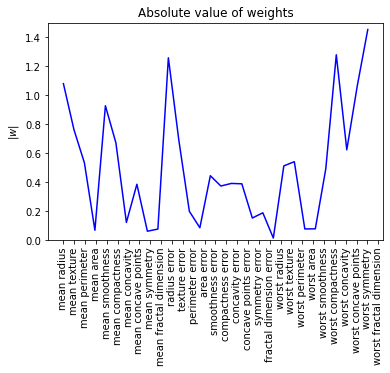

In [16]:
fig, ax = plt.subplots()
ax.plot(np.abs(w_map),'b')
ax.set_xticks(np.linspace(0,len(feature_names),len(feature_names)))
ax.set_xticklabels(feature_names, rotation = 90)
ax.set_ylim([0,1.5])
ax.set_title('Absolute value of weights')
ax.set_ylabel(r'$|w|$')
plt.show()